Implementing linear regression with one variable to predict profict for a resturant franchise.

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

# Problem Statement
Suppose we are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

We would like to expand our business to cities that may give our restaurant higher profits.
The chain already has restaurants in various cities and we have data for profits and populations from the cities.
we also have data on cities that are candidates for a new restaurant.
For these cities, we have the city population.
Can we use the data to help you identify which cities may potentially give our business higher profits?

In [4]:
#load the dataset
x_train, y_train = load_data()

#### View the variables
Before starting on any task, it is useful to get more familiar with our dataset.

A good place to start is to just print out each variable and see what it contains.
The code below prints the variable x_train and the type of the variable

In [5]:
#print x_train
print("Type of x_train: ", type(x_train))
print("First five elements of x_train are: \n", x_train[:5])

Type of x_train:  <class 'numpy.ndarray'>
First five elements of x_train are: 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


x_train is a numpy array that contains decimal values that are all greater than zero.

These values represent the city population times 10,000
For example, 6.1101 means that the population for that city is 61,101
Now, let's print y_train

In [7]:
#print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are: \n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are: 
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, y_train is a numpy array that has decimal values, some negative, some positive.

These represent your restaurant's average monthly profits in each city, in units of 10,000.
For example, 17.592 represents 175,920 in average monthly profits for that city.
-2.6807 represents -26,807 in average monthly loss for that city.

Visualize your data
It is often useful to understand the data by visualizing it.

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).When we have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.

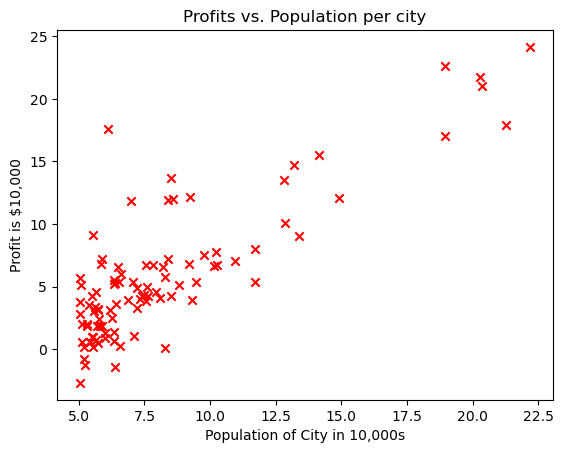

In [9]:
#Create a scatter plot of the data.To change the marker to red "x", we used the "maker" and "c" parameters
plt.scatter(x_train, y_train, marker="x",c="r")
#Set the title
plt.title("Profits vs. Population per city")
#Set the y_axis label
plt.ylabel("Profit is $10,000")
#Set the x-axis label
plt.xlabel("Population of City in 10,000s")
plt.show()

Our goal is to build a linear regression model to fit this data.

With this model, we can then input a new city's population, and have the model estimate our restaurant's potential monthly profits for that city.

### Refresher on linear regression

We will fit the linear regression parameters  (𝑤,𝑏)
  to our dataset. 

The model function for linear regression, which is a function that maps from x (city population) to y (your restaurant's monthly profit for that city) is represented as
𝑓𝑤,𝑏(𝑥)=𝑤𝑥+𝑏

To train a linear regression model, we want to find the best  (𝑤,𝑏)
  parameters that fit your dataset.

To compare how one choice of  (𝑤,𝑏)
  is better or worse than another choice, we can evaluate it with a cost function  𝐽(𝑤,𝑏)
 
𝐽
  is a function of  (𝑤,𝑏)
 . That is, the value of the cost  𝐽(𝑤,𝑏)
  depends on the value of  (𝑤,𝑏)
 .
The choice of  (𝑤,𝑏)
  that fits our data the best is the one that has the smallest cost  𝐽(𝑤,𝑏)
 .

To find the values  (𝑤,𝑏)
  that gets the smallest possible cost  𝐽(𝑤,𝑏)
 , we can use a method called gradient descent.
With each step of gradient descent, our parameters  (𝑤,𝑏)
  come closer to the optimal values that will achieve the lowest cost  𝐽(𝑤,𝑏)
 .
The trained linear regression model can then take the input feature  𝑥
  (city population) and output a prediction  𝑓𝑤,𝑏(𝑥)
  (predicted monthly profit for a restaurant in that city).

# Compute Cost
Gradient descent involves repeated steps to adjust the value of your parameter  (𝑤,𝑏)
  to gradually get a smaller and smaller cost  𝐽(𝑤,𝑏)
 .

In [12]:
#GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b):
    #number of training examples
    m = x.shape[0]
    # we need to return this variable correctly
    total_cost = 0
    for i in range(m):
        f_wb = w*x[i] +b
        total_cost += (f_wb -y[i]) **2
        
    total_cost = (1/(2*m))* total_cost
    return total_cost

In [13]:
# Compute cost with some initioal values for paramaters w,b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f"Cost at initial w : {cost:3f}")

#Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w : 75.203385
All tests passed!


# Gradient descent
we will implement the gradient for parameters w, b for linear regression.

In [14]:
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b):
    # Number of traning examples
    m = x.shape[0]
    #we need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db
    

In [15]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [16]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [17]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  # number of training examples
    m = len(x)    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing
    

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [18]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


We will now use the final parameters from gradient descent to plot the linear fit.

In [19]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

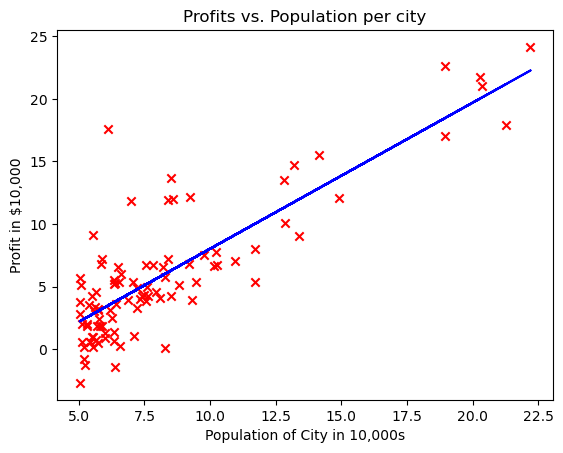

In [21]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')


Your final values of  𝑤,𝑏
  can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

In [22]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
